In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [4]:
# Importing all datasets
process_data = pd.read_csv("Process_Completion_Data.csv")
process_data.head()

,ProcessId,PlanId,ProcessTitle,ProcessDocument,ProcessState,ProcessStateReason,StartDate,EndDate,PendingInvokesCount,ModifiedCount,NumberOfJumpSteps,NumberOfServicesPresent,ProceessType
0,3.675890e+17,3.596270e+17,SubProcessWithWaitInMinutes2,NULL,1,101,2019-10-12 08:29:23.392,2019-10-12 08:30:23.449,0,15,0,2,SubProcess
1,3.711980e+17,3.708180e+17,SubProcessWithWaitInMinutes2,NULL,0,101,2019-10-22 07:30:03.803,2019-10-22 07:31:03.857,0,15,4,2,SubProcess
2,4.751990e+17,3.596270e+17,SubProcessWithWaitInSeconds,NULL,0,101,2020-08-04 07:09:20.000,2020-08-04 07:09:44.898,0,15,1,2,SubProcess
3,5.107090e+17,3.708180e+17,SubProcessWithWaitInMinutes2,NULL,1,101,2020-11-10 06:54:00.622,2020-11-10 06:55:00.670,0,15,2,2,SubProcess
4,5.766950e+17,5.763650e+17,SubProcessWithWaitInMinutes2,NULL,1,101,2021-05-11 09:00:17.803,2021-05-11 09:01:17.831,0,12,1,4,SubProcess


In [5]:
process_data.shape

(100, 13)

In [6]:
process_data.describe()

,ProcessId,PlanId,ProcessState,ProcessStateReason,PendingInvokesCount,ModifiedCount,NumberOfJumpSteps,NumberOfServicesPresent
count,1.000000e+02,1.000000e+02,100.00,100.000000,100.0,100.000000,100.000000,100.000000
mean,9.214563e+17,9.142576e+17,0.55,19.190000,0.0,4.530000,2.290000,2.010000
std,1.426197e+17,1.575065e+17,0.50,39.822002,0.0,4.630717,1.736681,1.259269
min,3.675890e+17,3.596270e+17,0.00,0.000000,0.0,2.000000,0.000000,0.000000
25%,9.847580e+17,9.836200e+17,0.00,0.000000,0.0,2.000000,1.000000,1.000000
50%,9.847815e+17,9.836260e+17,1.00,0.000000,0.0,2.000000,2.000000,2.000000
75%,9.850630e+17,9.846910e+17,1.00,0.000000,0.0,3.250000,4.000000,3.000000
max,9.850960e+17,9.846910e+17,1.00,101.000000,0.0,15.000000,5.000000,4.000000


In [7]:
process_data.columns = process_data.columns.str.strip()


In [8]:
process_data.columns

Index(['ProcessId', 'PlanId', 'ProcessTitle', 'ProcessDocument',
       'ProcessState', 'ProcessStateReason', 'StartDate', 'EndDate',
       'PendingInvokesCount', 'ModifiedCount', 'NumberOfJumpSteps',
       'NumberOfServicesPresent', 'ProceessType'],
      dtype='object')

In [9]:
#Droping the records which are not useful for analytics
process_data = process_data.drop(['ProcessId','PlanId','ProcessTitle','ProcessDocument','StartDate','EndDate'], axis=1)

In [10]:
process_data.head()

,ProcessState,ProcessStateReason,PendingInvokesCount,ModifiedCount,NumberOfJumpSteps,NumberOfServicesPresent,ProceessType
0,1,101,0,15,0,2,SubProcess
1,0,101,0,15,4,2,SubProcess
2,0,101,0,15,1,2,SubProcess
3,1,101,0,15,2,2,SubProcess
4,1,101,0,12,1,4,SubProcess


In [11]:
process_data['ProceessType'].value_counts()

ProceessType
 Guide                    33
 SubProcess               19
Name: count, dtype: int64

In [13]:
ml = pd.get_dummies(process_data['ProceessType'], prefix='ProceessType', drop_first=True, dtype='int')
process_data = pd.concat([process_data,ml], axis=1)

In [14]:
process_data = process_data.drop('ProceessType',axis=1)

In [15]:
process_data

,ProcessState,ProcessStateReason,PendingInvokesCount,ModifiedCount,NumberOfJumpSteps,NumberOfServicesPresent,ProceessType_ SubProcess
0,1,101,0,15,0,2,1
1,0,101,0,15,4,2,1
2,0,101,0,15,1,2,1
3,1,101,0,15,2,2,1
4,1,101,0,12,1,4,1
...,...,...,...,...,...,...,...
95,1,0,0,2,5,0,0
96,1,0,0,2,5,1,0
97,1,0,0,2,1,1,0
98,0,0,0,2,1,0,0


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Putting feature variable to X
X = process_data.drop(['ProcessState'], axis=1)

X.head()

,ProcessStateReason,PendingInvokesCount,ModifiedCount,NumberOfJumpSteps,NumberOfServicesPresent,ProceessType_ SubProcess
0,101,0,15,0,2,1
1,101,0,15,4,2,1
2,101,0,15,1,2,1
3,101,0,15,2,2,1
4,101,0,12,1,4,1


In [18]:
# Putting response variable to y
y = process_data['ProcessState']

y.head()

0    1
1    0
2    0
3    1
4    1
Name: ProcessState, dtype: int64

In [19]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

X_train[['ProcessStateReason','ModifiedCount']] = scaler.fit_transform(X_train[['ProcessStateReason','ModifiedCount']])

X_train.head()

,ProcessStateReason,PendingInvokesCount,ModifiedCount,NumberOfJumpSteps,NumberOfServicesPresent,ProceessType_ SubProcess
29,-0.519462,0,-0.594234,2,4,0
83,-0.519462,0,-0.594234,0,1,0
82,-0.519462,0,-0.385731,1,3,0
43,-0.519462,0,-0.594234,5,3,0
28,-0.519462,0,-0.594234,4,2,0


In [22]:
percentage_fail = (sum(process_data['ProcessState'])/len(process_data['ProcessState'].index))*100
percentage_fail

55.00000000000001

In [23]:
import statsmodels.api as sm

In [24]:
X_train_sm = sm.add_constant(X_train)

In [25]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           ProcessState   No. Observations:                   80
Model:                            GLM   Df Residuals:                       75
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -54.502
Date:                Wed, 26 Jun 2024   Deviance:                       109.00
Time:                        10:08:45   Pearson chi2:                     79.9
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01796
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.3100      0.532      0.583      0.560      -0.733       1.353
ProcessStateReason           0.5811      0.645      0.901      0.368      -0.684       1.846
PendingInvokesCount        1.93e-16   2.59e-16      0.744      0.457   -3.16e-16    7.01e-16
ModifiedCount               -0.7442      0.753     -0.988      0.323      -2.220       0.732
NumberOfJumpSteps           -0.0954      0.137     -0.696      0.486      -0.364       0.173
NumberOfServicesPresent     -0.0060      0.191     -0.032      0.975      -0.380       0.368
ProceessType_ SubProcess     0.3036      0.277      1.097      0.273      -0.239       0.846
============================================================================================
"""

In [26]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,ProcessStateReason,inf
6,ProceessType_ SubProcess,inf
3,ModifiedCount,8.83
4,NumberOfJumpSteps,1.04
5,NumberOfServicesPresent,1.04
0,const,0.00
2,PendingInvokesCount,NaN


In [27]:
X_train_sm = X_train_sm.drop('ProcessStateReason', axis=1)

In [29]:
# Logistic regression model
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           ProcessState   No. Observations:                   80
Model:                            GLM   Df Residuals:                       75
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -54.502
Date:                Wed, 26 Jun 2024   Deviance:                       109.00
Time:                        10:22:24   Pearson chi2:                     79.9
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01796
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0082      0.656      0.012      0.990      -1.277       1.293
PendingInvokesCount       4.855e-16   5.31e-16      0.914      0.361   -5.55e-16    1.53e-15
ModifiedCount               -0.7442      0.753     -0.988      0.323      -2.220       0.732
NumberOfJumpSteps           -0.0954      0.137     -0.696      0.486      -0.364       0.173
NumberOfServicesPresent     -0.0060      0.191     -0.032      0.975      -0.380       0.368
ProceessType_ SubProcess     1.7241      1.834      0.940      0.347      -1.870       5.318
============================================================================================
"""

In [30]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,ProceessType_ SubProcess,8.87
2,ModifiedCount,8.83
0,const,7.78
3,NumberOfJumpSteps,1.04
4,NumberOfServicesPresent,1.04
1,PendingInvokesCount,NaN


In [31]:
X_train_sm = X_train_sm.drop('PendingInvokesCount', axis=1)

In [36]:
# Logistic regression model
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           ProcessState   No. Observations:                   80
Model:                            GLM   Df Residuals:                       75
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -54.502
Date:                Wed, 26 Jun 2024   Deviance:                       109.00
Time:                        10:45:43   Pearson chi2:                     79.9
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01796
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0082      0.656      0.012      0.990      -1.277       1.293
ModifiedCount               -0.7442      0.753     -0.988      0.323      -2.220       0.732
NumberOfJumpSteps           -0.0954      0.137     -0.696      0.486      -0.364       0.173
NumberOfServicesPresent     -0.0060      0.191     -0.032      0.975      -0.380       0.368
ProceessType_ SubProcess     1.7241      1.834      0.940      0.347      -1.870       5.318
============================================================================================
"""

In [37]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

29    0.558603
83    0.609298
82    0.545311
43    0.488846
28    0.514194
22    0.581973
23    0.514194
90    0.607861
86    0.514194
20    0.448713
dtype: float64

In [38]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.5586027 , 0.60929791, 0.5453114 , 0.48884563, 0.51419437,
       0.58197275, 0.51419437, 0.60786063, 0.51419437, 0.44871314])

In [39]:
y_train_pred_final = pd.DataFrame({'ProcessState':y_train.values, 'ProcessState_predicted':y_train_pred})
y_train_pred_final['Id'] = y_train.index
y_train_pred_final.head()

,ProcessState,ProcessState_predicted,Id
0,1,0.558603,29
1,1,0.609298,83
2,0,0.545311,82
3,1,0.488846,43
4,1,0.514194,28


In [40]:
y_train_pred_final['predicted'] = y_train_pred_final.ProcessState_predicted.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,ProcessState,ProcessState_predicted,Id,predicted
0,1,0.558603,29,1
1,1,0.609298,83,1
2,0,0.545311,82,1
3,1,0.488846,43,0
4,1,0.514194,28,1


In [41]:
from sklearn import metrics

In [42]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.ProcessState, y_train_pred_final.predicted )
print(confusion)

[[ 6 31]
 [ 8 35]]


In [44]:
print(metrics.accuracy_score(y_train_pred_final.ProcessState, y_train_pred_final.predicted))

0.5125


In [45]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [46]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.813953488372093

In [47]:
# Let us calculate specificity
TN / float(TN+FP)

0.16216216216216217

In [48]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.8378378378378378


In [49]:
# positive predictive value 
print (TP / float(TP+FP))

0.5303030303030303


In [50]:
# Negative predictive value
print (TN / float(TN+ FN))

0.42857142857142855


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [56]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.ProcessState, y_train_pred_final.ProcessState_predicted, drop_intermediate = False )

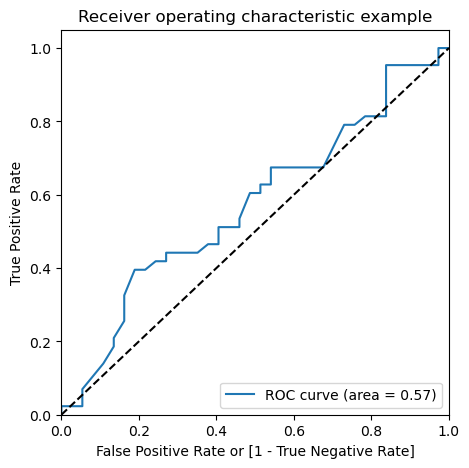

In [57]:
draw_roc(y_train_pred_final.ProcessState, y_train_pred_final.ProcessState_predicted)

In [58]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.ProcessState_predicted.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,ProcessState,ProcessState_predicted,Id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.558603,29,1,1,1,1,1,1,1,0,0,0,0
1,1,0.609298,83,1,1,1,1,1,1,1,1,0,0,0
2,0,0.545311,82,1,1,1,1,1,1,1,0,0,0,0
3,1,0.488846,43,0,1,1,1,1,1,0,0,0,0,0
4,1,0.514194,28,1,1,1,1,1,1,1,0,0,0,0


In [59]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.ProcessState, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0    0.5375  1.000000  0.000000
0.1   0.1    0.5375  1.000000  0.000000
0.2   0.2    0.5375  1.000000  0.000000
0.3   0.3    0.5500  1.000000  0.027027
0.4   0.4    0.5375  0.976744  0.027027
0.5   0.5    0.5125  0.813953  0.162162
0.6   0.6    0.5000  0.186047  0.864865
0.7   0.7    0.4625  0.000000  1.000000
0.8   0.8    0.4625  0.000000  1.000000
0.9   0.9    0.4625  0.000000  1.000000


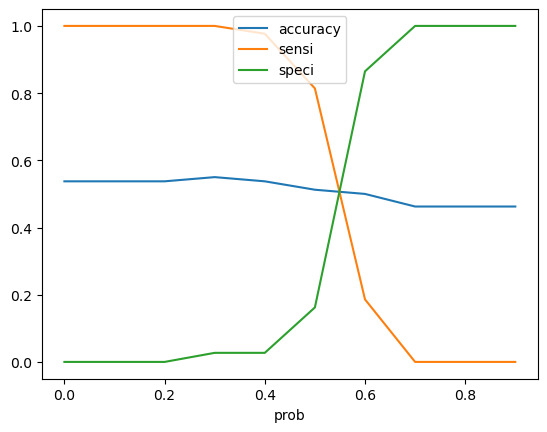

In [60]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Cutoff is around 0.55 which is same as we have taken earlier

Making predictions on test set

In [61]:
X_test[['ProcessStateReason','ModifiedCount']] = scaler.fit_transform(X_test[['ProcessStateReason','ModifiedCount']])

In [62]:
X_test_sm = sm.add_constant(X_test)

In [63]:
X_test_sm.shape

(20, 7)

In [64]:
X_train_sm.shape

(80, 5)

In [65]:
X_test_sm = X_test_sm.drop('ProcessStateReason', axis=1)

In [66]:
X_test_sm = X_test_sm.drop('PendingInvokesCount', axis=1)

In [67]:
X_test_sm.shape

(20, 5)

In [68]:
y_test_pred = res.predict(X_test_sm)

In [69]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [70]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [71]:
# Putting CustID to index
y_test_df['Id'] = y_test_df.index

In [72]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [73]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [74]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'ProcessState_Prob'})

In [75]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Id','ProcessState','ProcessState_Prob'], axis=1)

In [76]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Id,ProcessState,ProcessState_Prob
0,37,0,0.541972
1,62,1,0.495887
2,26,1,0.565538
3,41,1,0.469064
4,35,1,0.538975


In [78]:
y_pred_final['final_predicted'] = y_pred_final.ProcessState_Prob.map(lambda x: 1 if x > 0.55 else 0)

In [79]:
y_pred_final.head()

,Id,ProcessState,ProcessState_Prob,final_predicted
0,37,0,0.541972,0
1,62,1,0.495887,0
2,26,1,0.565538,1
3,41,1,0.469064,0
4,35,1,0.538975,0


In [81]:
metrics.accuracy_score(y_pred_final.ProcessState, y_pred_final.final_predicted)

0.45

In [82]:
confusion2 = metrics.confusion_matrix(y_pred_final.ProcessState, y_pred_final.final_predicted )
confusion2

array([[ 7,  1],
       [10,  2]], dtype=int64)

In [83]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [84]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.16666666666666666

In [85]:
# Let us calculate specificity
TN / float(TN+FP)

0.875

Sensitivity is very low on the test set but can be improved with more training data on the model